In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

#loading the model
model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

#pre-processing the image
img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg"
)

def get_img_array(img_path, target_size):
    #opening the image file and resize it
    img = keras.utils.load_img(img_path, target_size=target_size)
    #turning the image into a float32 numpy array of shape (180, 180, 3)
    array = keras.utils.img_to_array(img)
    #adding dimension into the aaray to transform into batch of single sample
    #it's shape now is (1, 180, 180, 3)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

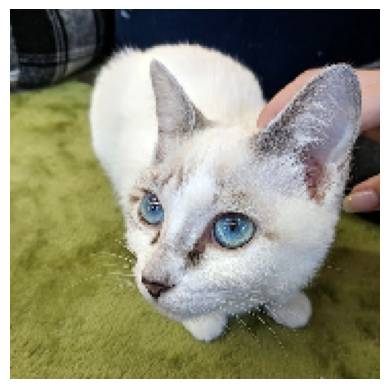

In [2]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

In [3]:
#instantiating a model that returns layer activations
layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

#model that return the outputs given the input
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

#returns a list of nine numpy arrays; one per layer activation
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 5s 5s/step


In [4]:
first_layer = activations[0]
print(first_layer.shape)

(1, 178, 178, 32)


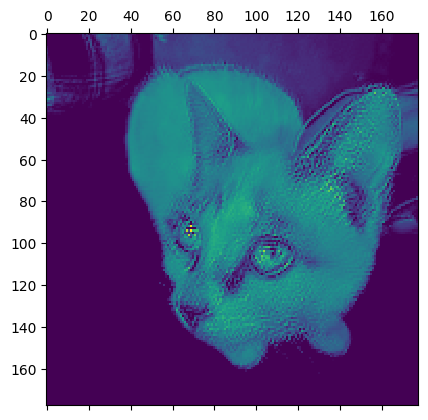

In [5]:
#activation of the fifth channel of the first_layer
plt.matshow(first_layer[0, :, :, 5], cmap="viridis")

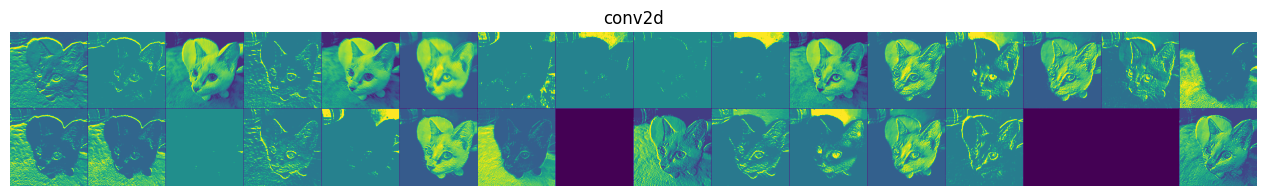

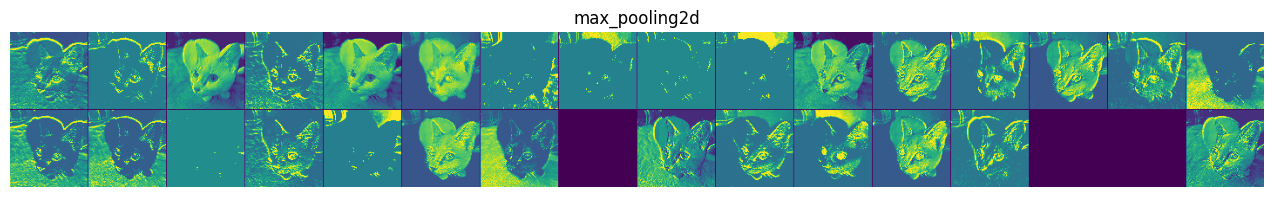

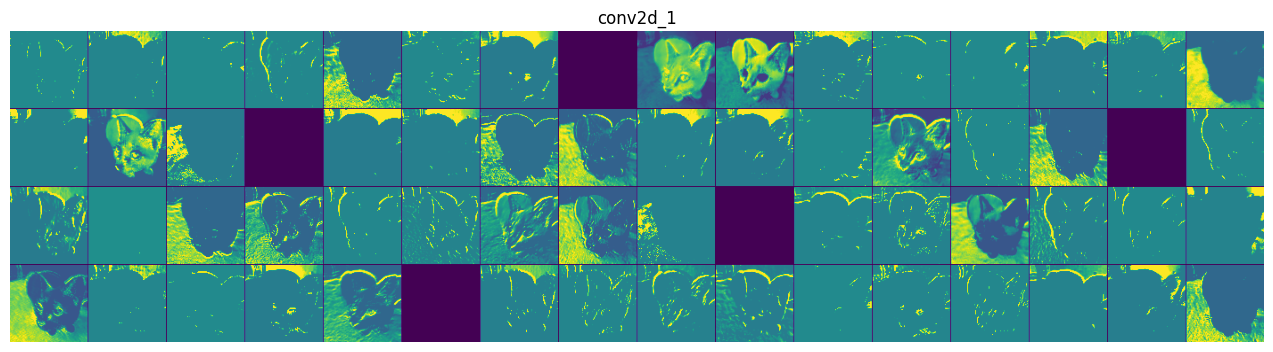

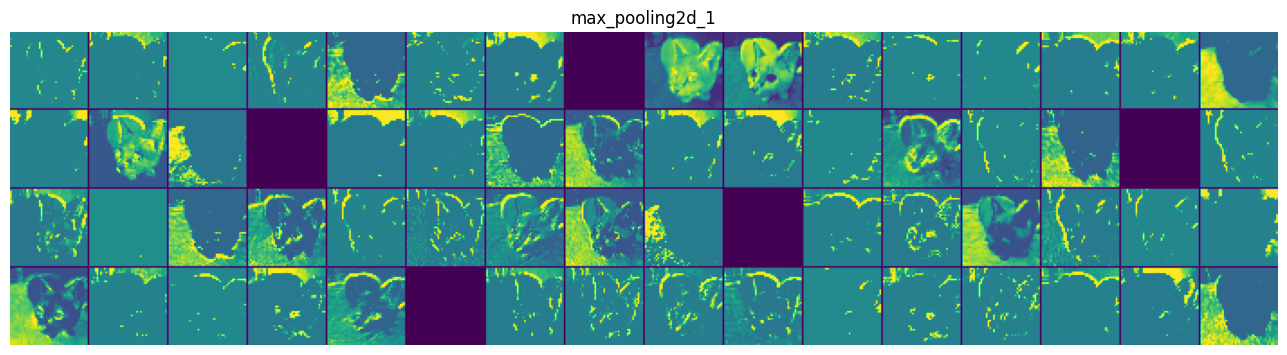

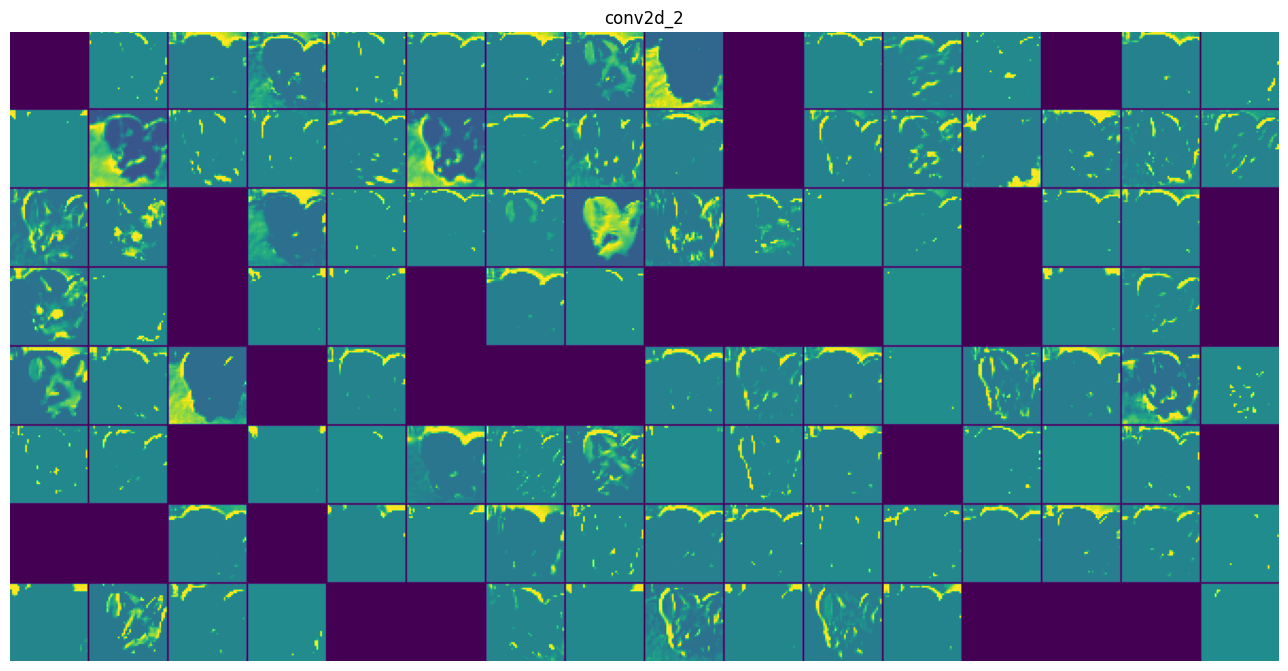

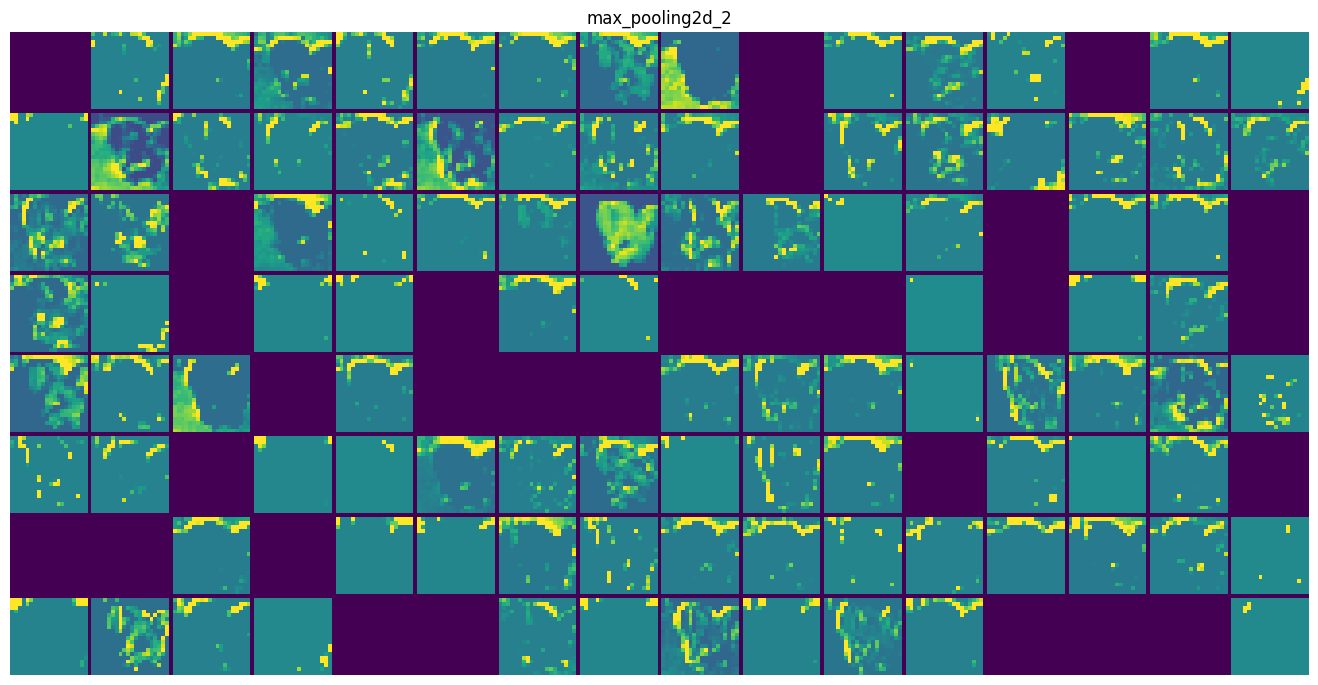

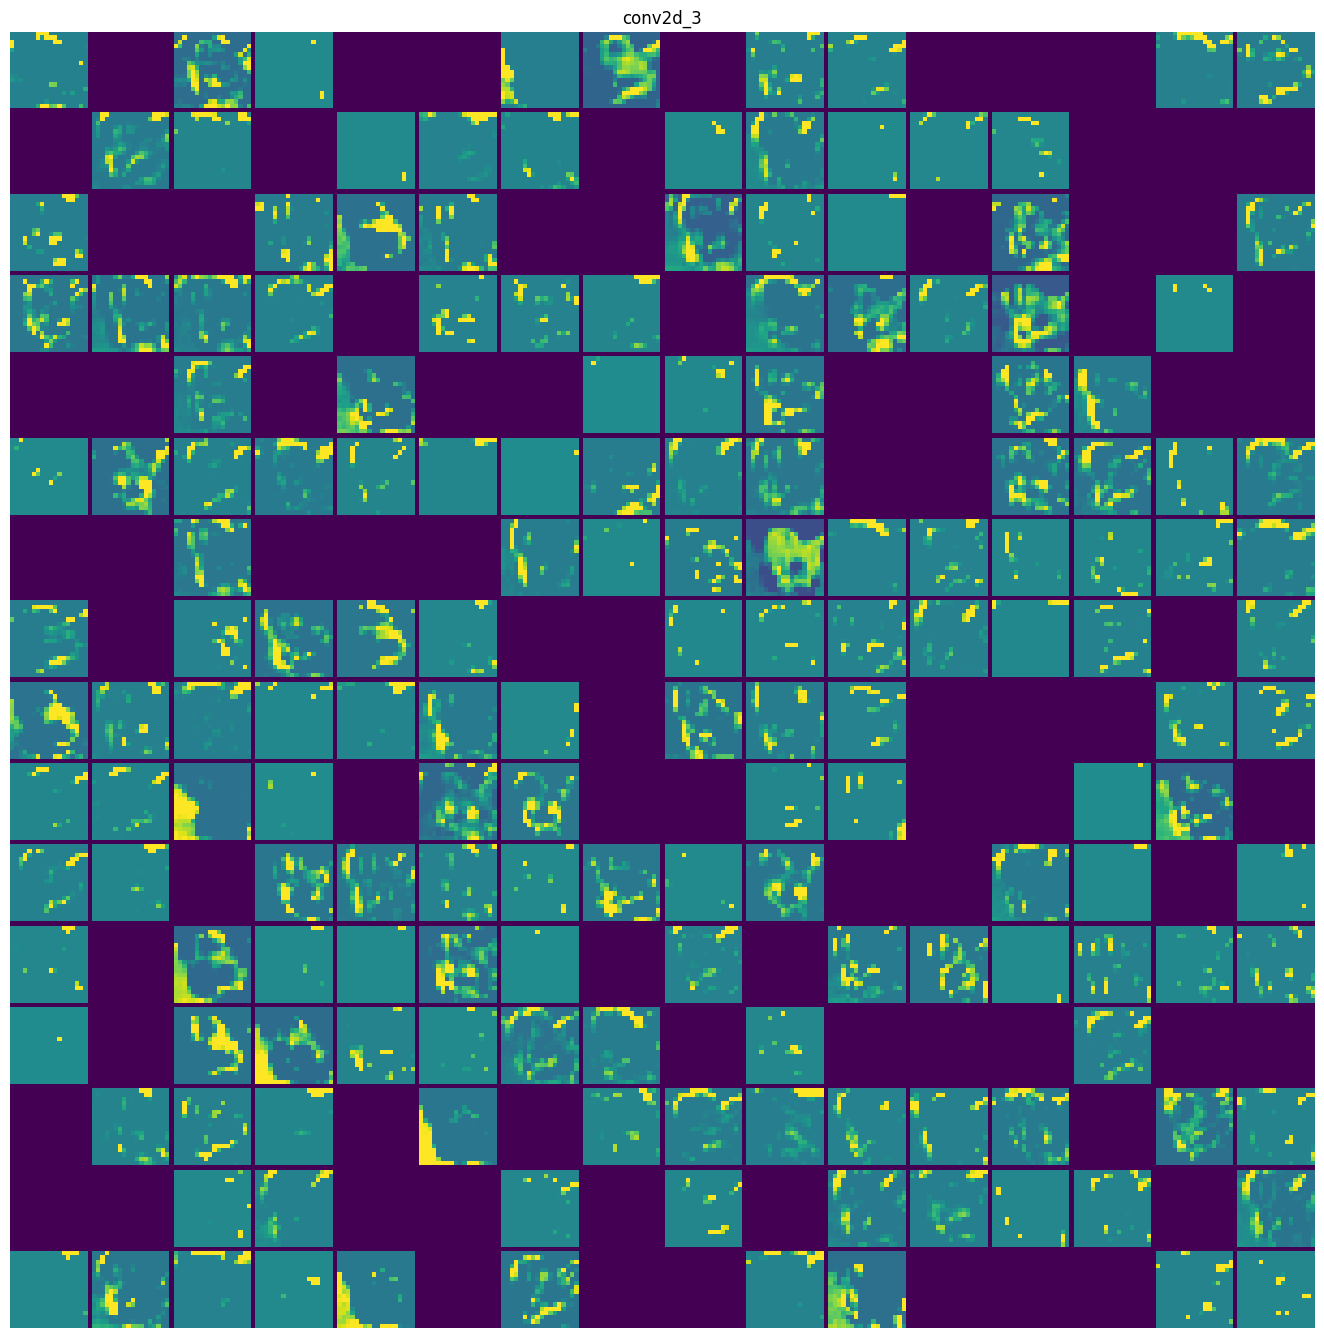

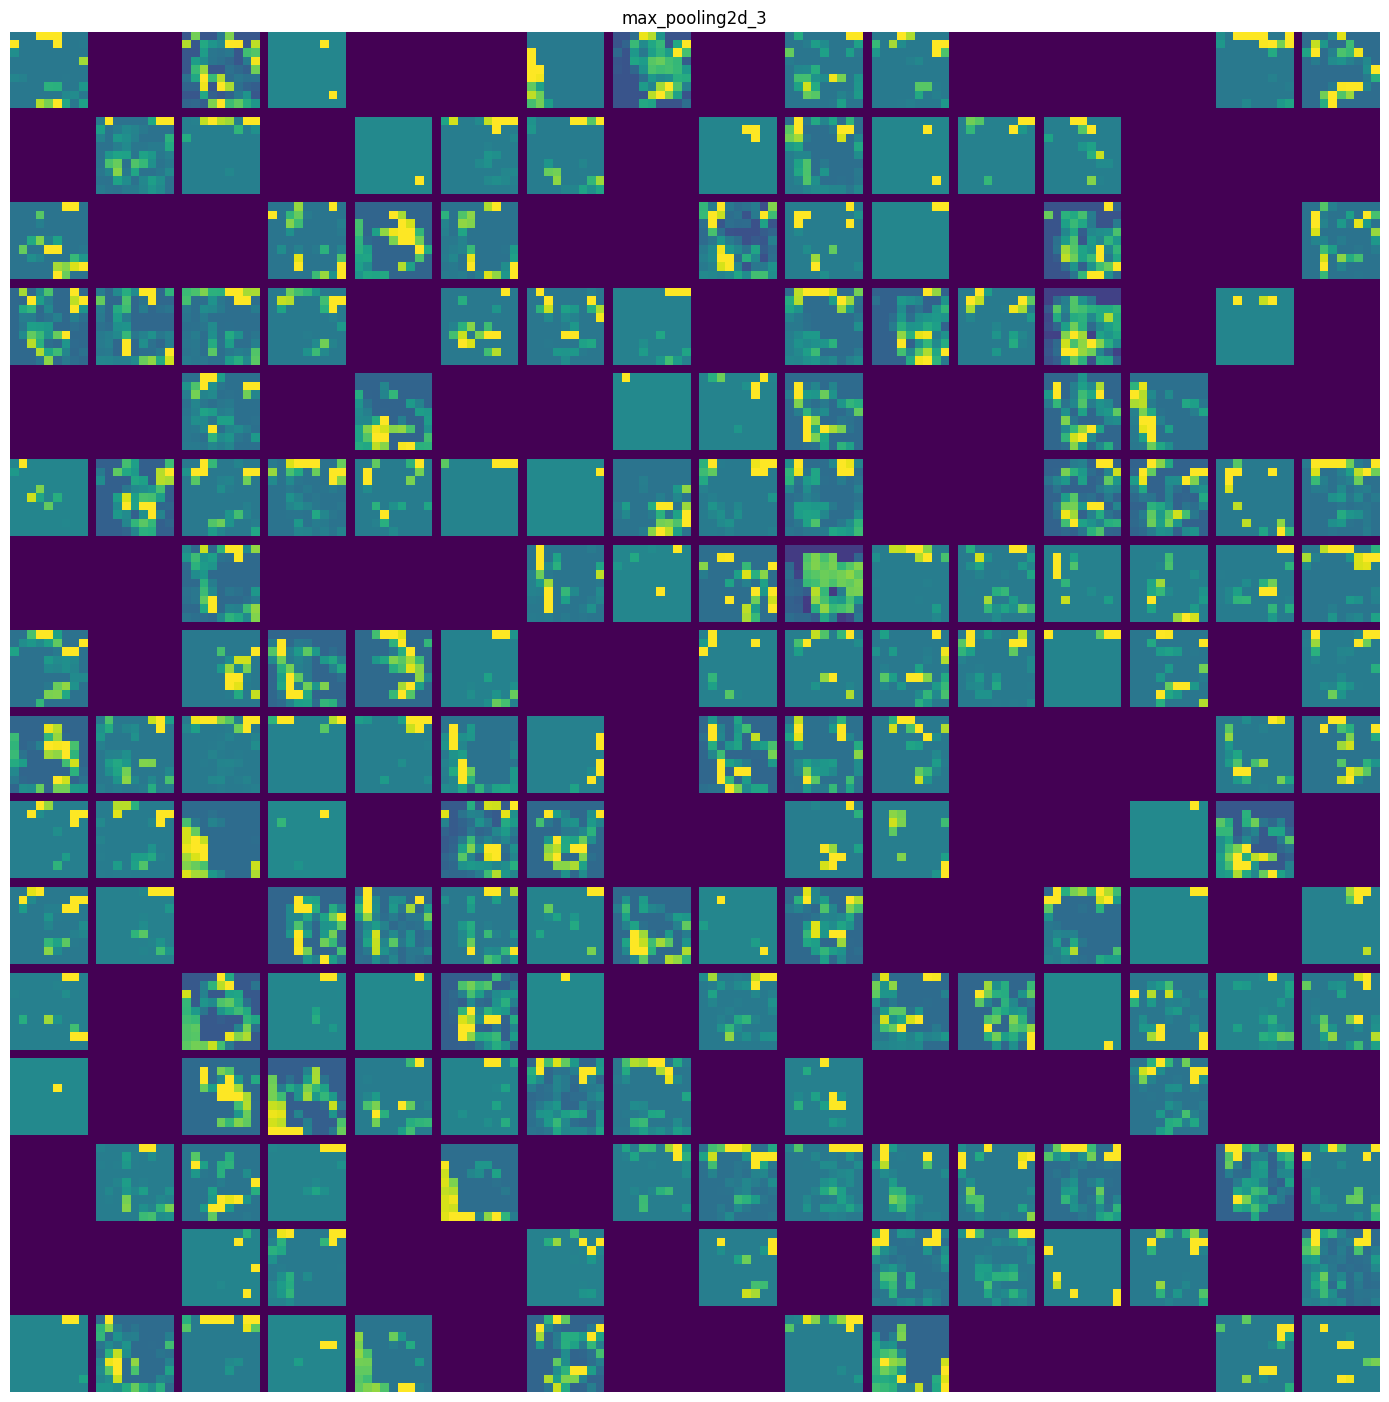

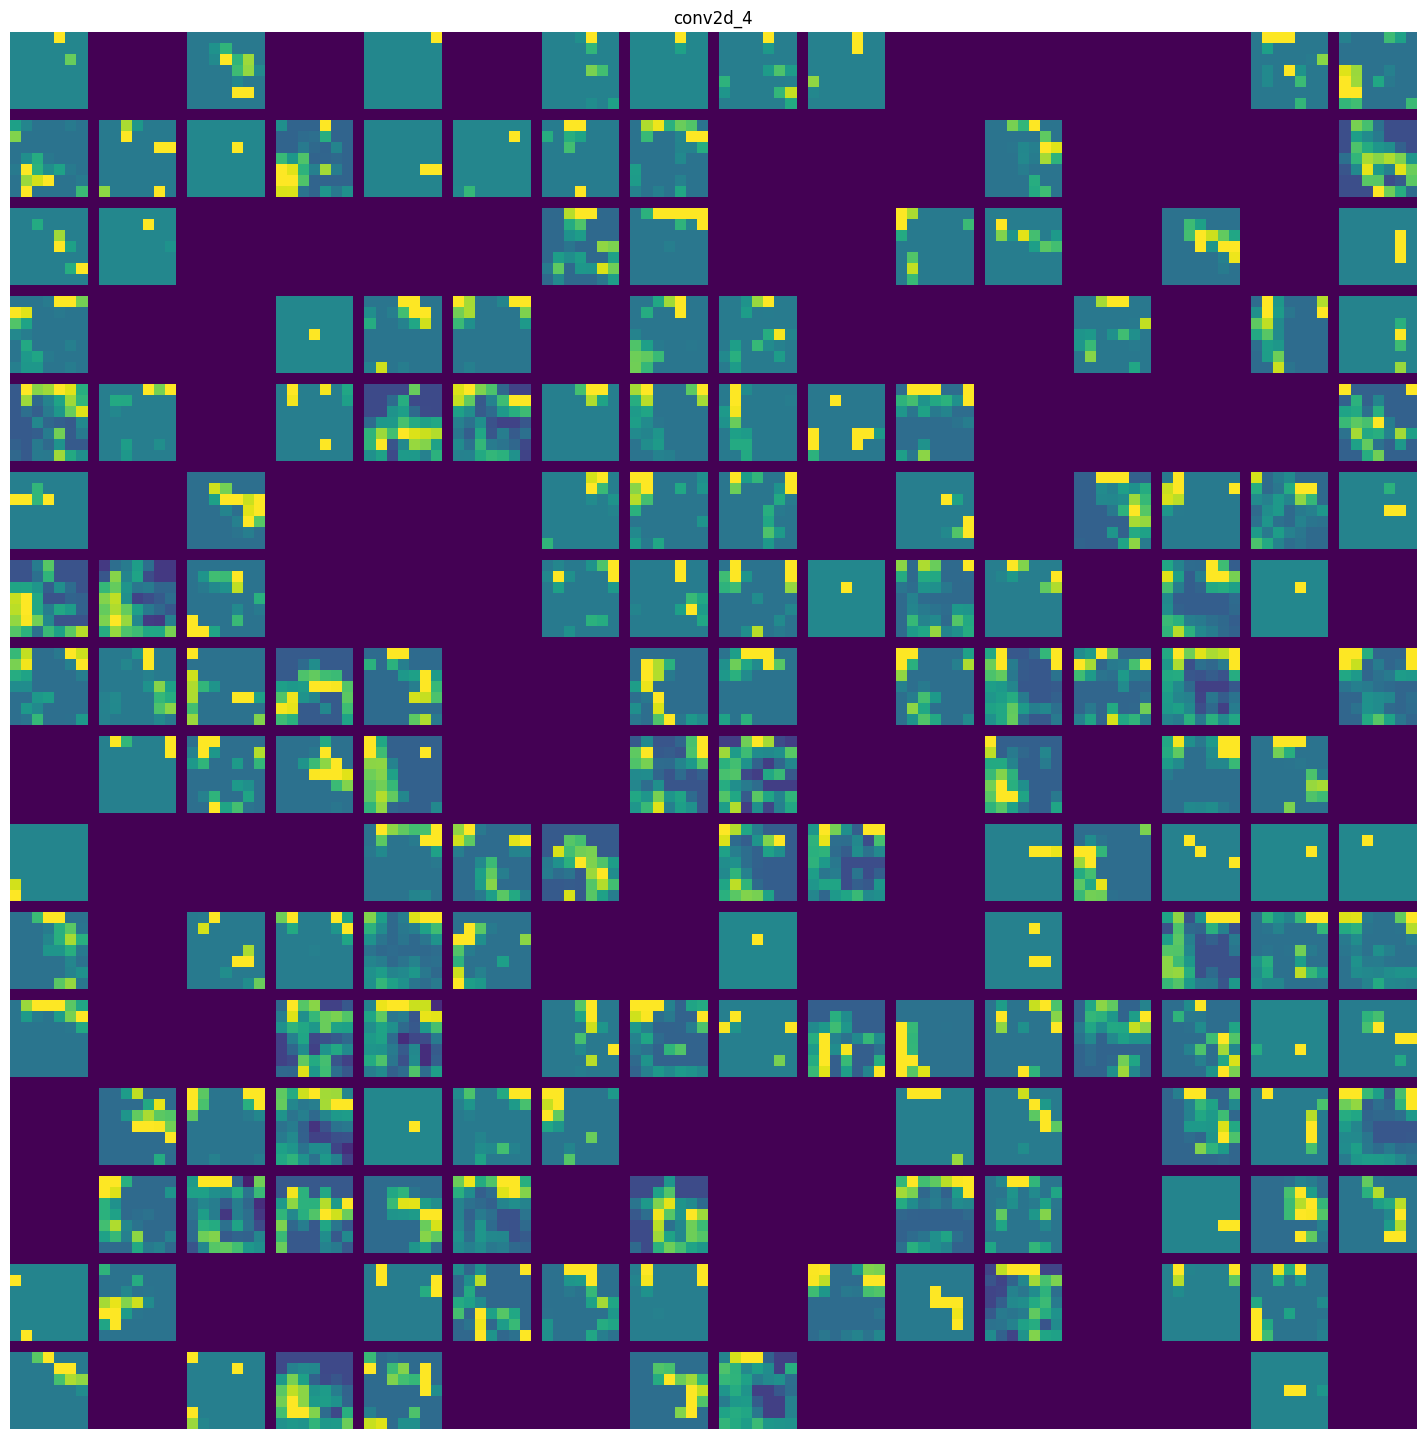

In [7]:
"""the activations of each layer are extracted then stacked
together resulting itno on big grid with channels stacked side by side"""

images_per_row = 16
for layer_name, layer_activation in  zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros(((size + 1) * n_cols - 1,
                           images_per_row * (size + 1) - 1))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_index = col * images_per_row + row
            channel_image = layer_activation[0, :, :, channel_index].copy()
            if channel_image.sum() != 0:
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[
                col * (size + 1): (col + 1) * size + col,
                row * (size + 1) : (row + 1) * size + row] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(display_grid, aspect="auto", cmap="viridis")
        